In [1]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import datetime
import pandas as pd

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
def get_density(image):
    return image[image!=0].mean()

In [3]:
def make_df(dir_path):
    files           = os.listdir(dir_path)
    df              = pd.DataFrame()
    dates           = list()
    density_vv_list = list()
    density_vh_list = list()

    for f in files:
        date        = "/".join(f.split("_")[:3])
        date_format = datetime.datetime.strptime(date, '%d/%m/%y')
        dates.append(date_format)

    df["Date"]  = dates
    df          = df.drop_duplicates()
    df          = df.sort_values("Date")

    for d in df["Date"]:
        try :
            string_date = d.strftime('%d_%m_%y')

            image_vv    = f'{dir_path}/{string_date}_vv.png'
            image_vh    = f'{dir_path}/{string_date}_vh.png'

            density_vv  = get_density(cv2.imread(image_vv, cv2.COLOR_BGR2GRAY))
            density_vh  = get_density(cv2.imread(image_vh, cv2.COLOR_BGR2GRAY))

            density_vv_list.append(density_vv)
            density_vh_list.append(density_vh)

        except Exception as e:
            print(f"For {d}\t> {e}")
            density_vv_list.append(None)
            density_vh_list.append(None)

    df["VV"]     = density_vv_list
    df["VH"]     = density_vh_list
    df["CR"]     = df["VV"].values/df["VH"].values

    df = df.dropna()

    return df

In [4]:
def plot_evolution(df, FigAx = None):

    single = False

    if FigAx is None:
        fig, ax1 = plt.subplots(figsize=(10, 5))
        single = True
    else : 
        fig, ax1 = FigAx[0], FigAx[1]
        
    ax1.plot(df["Date"], df["VV"].values, label='VV', color='b')
    ax1.plot(df["Date"], df["VH"].values, label='VH', color='r')
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('VV et VH', color='k')
    ax1.tick_params(axis='y', labelcolor='k') 

    ax2 = ax1.twinx()
    ax2.plot(df["Date"], df["CR"], label='CR', color='y', linestyle='--')
    ax2.set_ylabel('CR', color='y')
    ax2.tick_params(axis='y', labelcolor='y') 

    if single:
        fig.legend(bbox_to_anchor=(0.0, 0), bbox_transform=ax1.transAxes)
    plt.title('Variation of VV and VH bandwidths')
    plt.xlabel('Date')
    plt.ylabel('CR')
    plt.grid(True)

    plt.tight_layout()

/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


For 2017-11-12 00:00:00	> 'NoneType' object is not subscriptable


/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_112253/4069516079.py:2: RuntimeWarning: Mean of empty slice.
  return image[image!=0].mean()
/home/mathys/.local/lib/python3.10/site-packages/

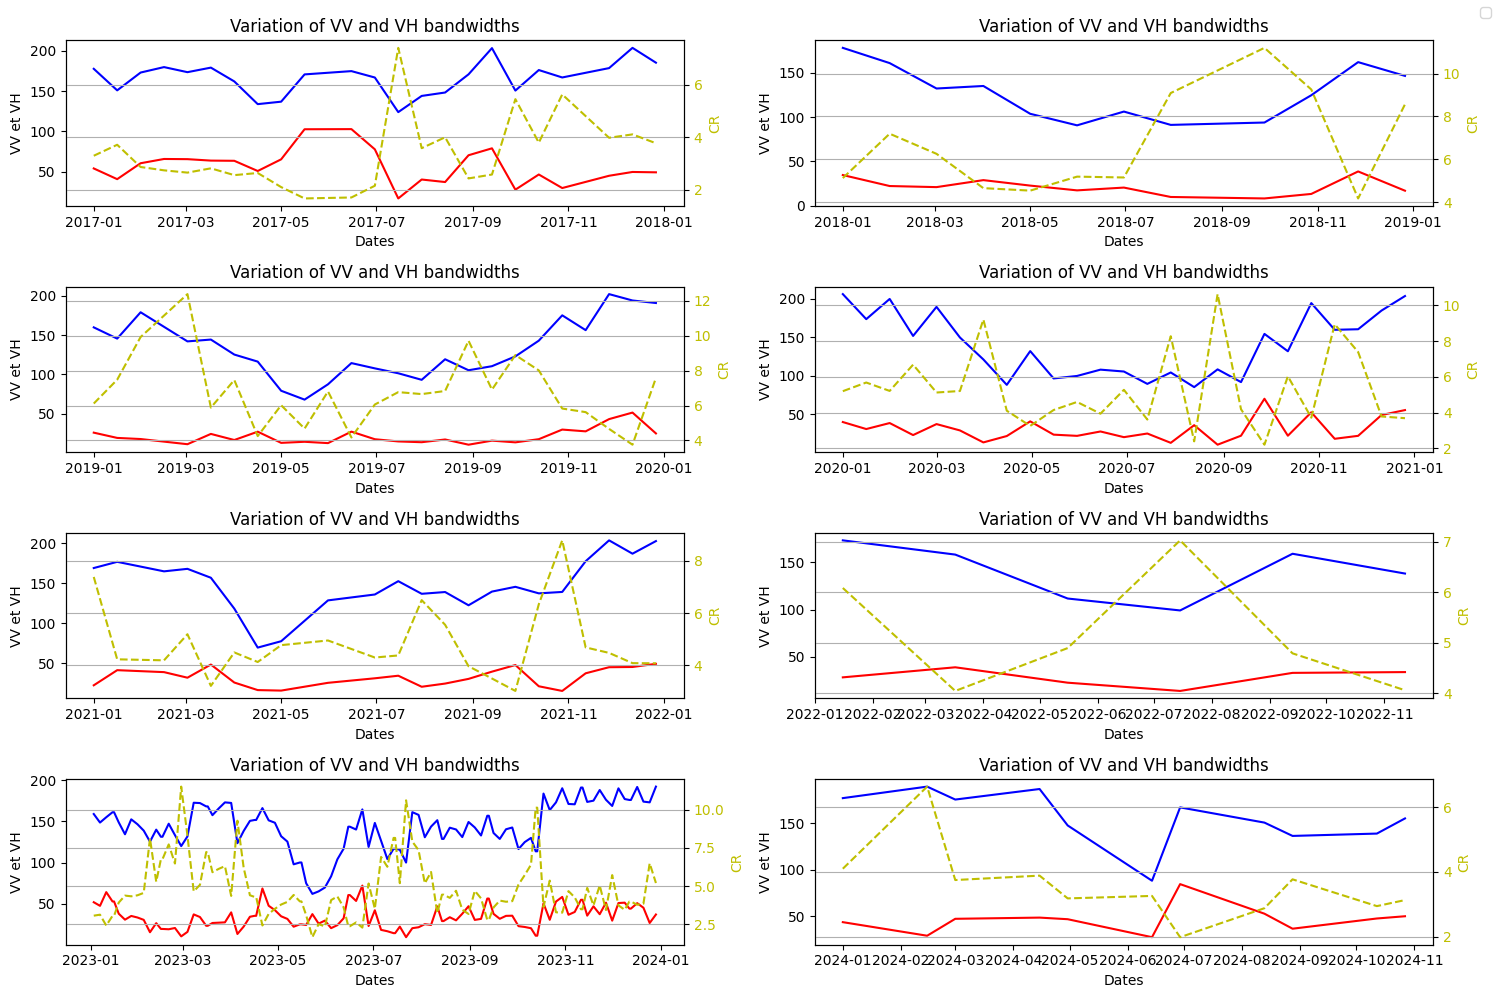

In [184]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
df_beauvais2017 = make_df("../Sentinel1_Images_Beauvais/2017")
df_beauvais2018 = make_df("../Sentinel1_Images_Beauvais/2018")
df_beauvais2019 = make_df("../Sentinel1_Images_Beauvais/2019")
df_beauvais2020 = make_df("../Sentinel1_Images_Beauvais/2020")
df_beauvais2021 = make_df("../Sentinel1_Images_Beauvais/2021")
df_beauvais2022 = make_df("../Sentinel1_Images_Beauvais/2022")
df_beauvais2023 = make_df("../Sentinel1_Images_Beauvais/2023")
df_beauvais2024 = make_df("../Sentinel1_Images_Beauvais/2024")

dfs = [df_beauvais2017, df_beauvais2018, df_beauvais2019, df_beauvais2020, df_beauvais2021, df_beauvais2022, df_beauvais2023, df_beauvais2024]

legend = True

for ax, df_subset in zip(axes.ravel(), dfs):
    if legend :
        fig.legend()
        legend = False

    plot_evolution(df_subset, (fig, ax))


plt.tight_layout()
plt.show()

In [166]:
def read_grayscale_image(filepath):
    """Reads a PNG image, handles transparency, and returns a grayscale image."""
    img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)  # Load with alpha channel if present
    if img is None:
        raise FileNotFoundError(f"Image not found: {filepath}")
    if img.shape[-1] == 4:  # If the image has an alpha channel
        alpha_channel = img[:, :, 3]  # Extract the alpha channel
        img = img[:, :, :3]  # Remove the alpha channel
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img[alpha_channel == 0] = 0  # Set transparent regions to black
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    return img

In [178]:
def plot_CR(current_df):

    low_cr = current_df[current_df["CR"] == current_df["CR"].min()]
    high_cr = current_df[current_df["CR"] == current_df["CR"].max()]

    low_cr_str = low_cr["Date"].values[0].astype('M8[ms]').astype(datetime.datetime).strftime('%d_%m_%y')
    high_cr_str = high_cr["Date"].values[0].astype('M8[ms]').astype(datetime.datetime).strftime('%d_%m_%y')
    
    im_low_cr_vv = read_grayscale_image(f'../Sentinel1_Images_Beauvais/20{low_cr_str[6:]}/{low_cr_str}_vv.png')
    im_low_cr_vh = read_grayscale_image(f'../Sentinel1_Images_Beauvais/20{low_cr_str[6:]}/{low_cr_str}_vh.png')

    im_high_cr_vv = read_grayscale_image(f'../Sentinel1_Images_Beauvais/20{high_cr_str[6:]}/{high_cr_str}_vv.png')
    im_high_cr_vh = read_grayscale_image(f'../Sentinel1_Images_Beauvais/20{high_cr_str[6:]}/{high_cr_str}_vh.png')
    
    # Safely compute the ratio and handle invalid values
    ratio_low = np.nan_to_num(im_low_cr_vv, nan=0.0, posinf=0.0, neginf=0.0)
    ratio_low = np.divide(ratio_low, im_low_cr_vh, where=(im_low_cr_vh != 0))
    
    ratio_high = np.nan_to_num(im_high_cr_vv, nan=0.0, posinf=0.0, neginf=0.0)
    ratio_high = np.divide(ratio_high, im_high_cr_vh, where=(im_high_cr_vh != 0))

    # Normalize the ratios for better visualization
    ratio_low = np.clip(ratio_low, 0, 255)  # Adjust based on expected value range
    ratio_high = np.clip(ratio_high, 0, 255)

    # Plot the images
    plt.imshow(ratio_low, cmap='gray_r')  # Display in grayscale
    plt.title(f'CR = {low_cr["CR"].values[0]}')
    plt.show()

    plt.imshow(ratio_high, cmap='gray_r')  # Display in grayscale
    plt.title(f'CR = {high_cr["CR"].values[0]}')
    plt.show()

    return

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/image.py:492: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


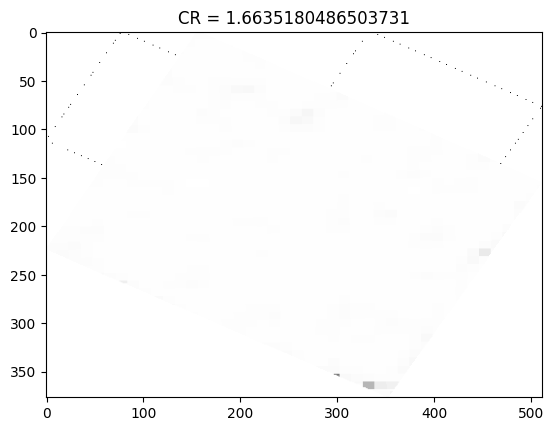

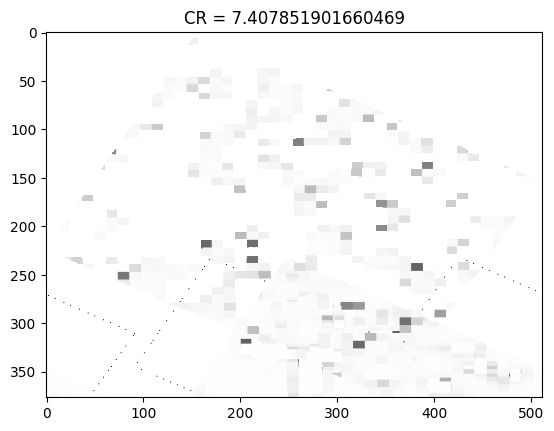

In [181]:
plot_CR(df_beauvais2017)

In [185]:
def make_df_sent2(dir_path):
    files             = os.listdir(dir_path)
    df                = pd.DataFrame()
    dates             = list()
    density_ndvi_list = list()

    for f in files:
        date        = "/".join(f.split("_")[:3])
        date_format = datetime.datetime.strptime(date, '%d/%m/%y')
        dates.append(date_format)

    df["Date"]  = dates
    df          = df.drop_duplicates()
    df          = df.sort_values("Date")

    for d in df["Date"]:
        try :
            string_date = d.strftime('%d_%m_%y')

            image_ndvi    = f'{dir_path}/{string_date}_vv.png'

            density_ndvi  = get_density(cv2.imread(image_ndvi, cv2.COLOR_BGR2GRAY))

            density_ndvi_list.append(density_ndvi)

        except Exception as e:
            print(f"For {d}\t> {e}")
            density_ndvi_list.append(None)

    df["NDVI"]     = density_ndvi_list

    df = df.dropna()

    return df

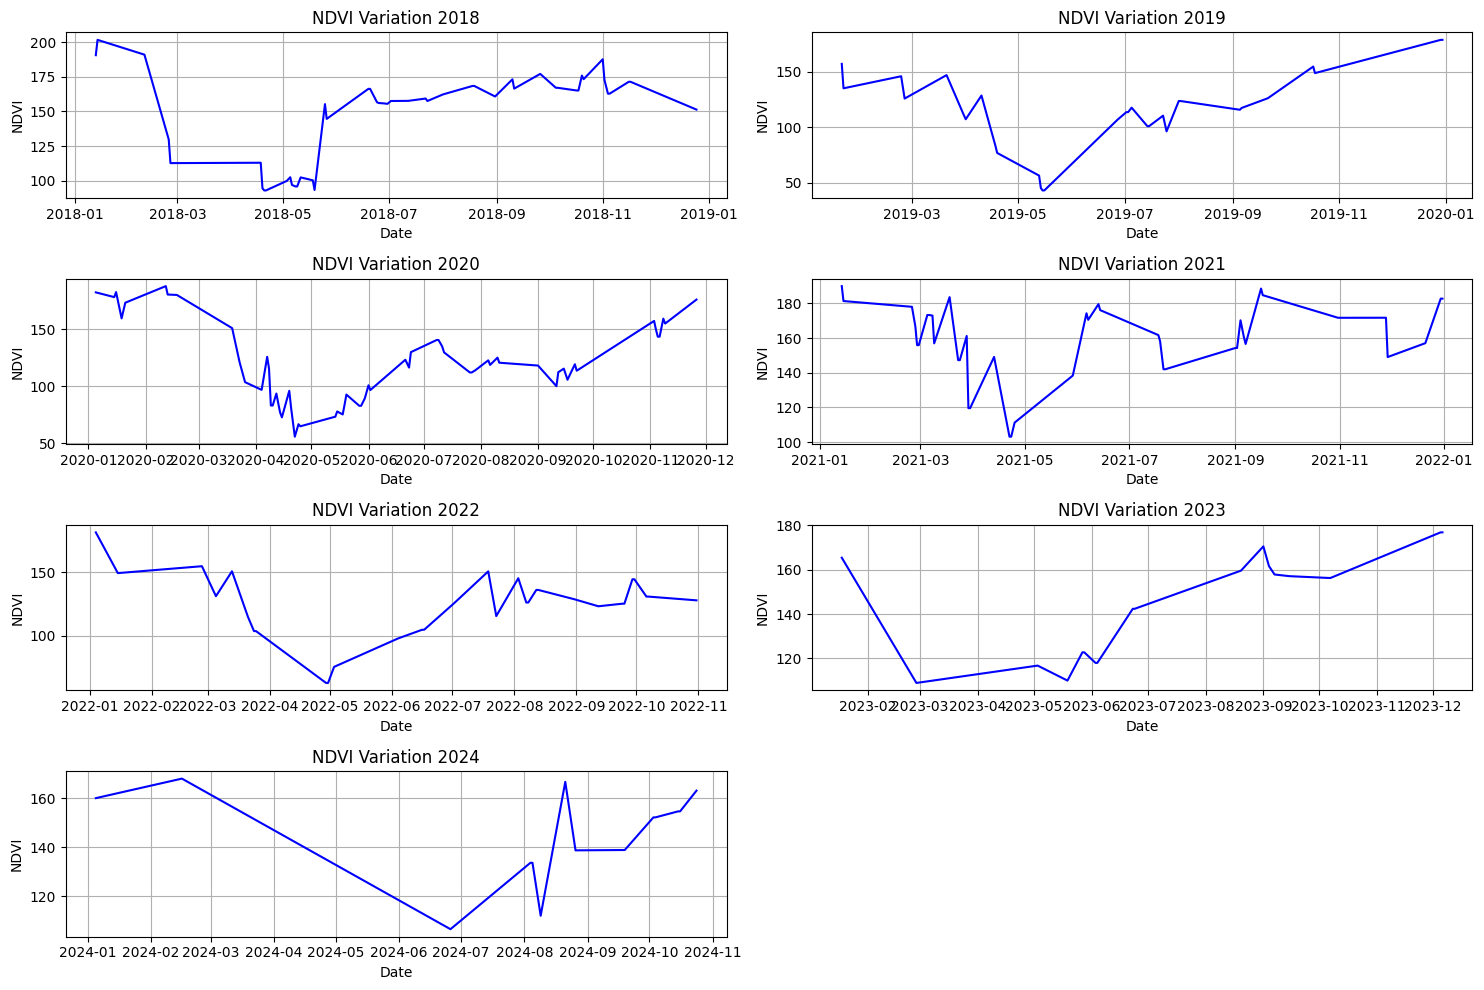

In [211]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))  # 4x2 grid for 8 subplots
axes = axes.flatten()  # Flatten to access all subplots as a flat array

# Load datasets
df_beauvais2018 = make_df_sent2("../Sentinel1_Images_Catillon/2018")
df_beauvais2019 = make_df_sent2("../Sentinel1_Images_Catillon/2019")
df_beauvais2020 = make_df_sent2("../Sentinel1_Images_Catillon/2020")
df_beauvais2021 = make_df_sent2("../Sentinel1_Images_Catillon/2021")
df_beauvais2022 = make_df_sent2("../Sentinel1_Images_Catillon/2022")
df_beauvais2023 = make_df_sent2("../Sentinel1_Images_Catillon/2023")
df_beauvais2024 = make_df_sent2("../Sentinel1_Images_Catillon/2024")

dfs = [df_beauvais2018, df_beauvais2019, df_beauvais2020, df_beauvais2021, df_beauvais2022, df_beauvais2023, df_beauvais2024]

# Plot each dataset
for i, df_subset in enumerate(dfs):
    ax = axes[i]  # Get the corresponding subplot
    ax.plot(df_subset["Date"], df_subset["NDVI"].values, label='NDVI', color='b')
    ax.set_xlabel('Date')
    ax.set_ylabel('NDVI', color='k')
    ax.set_title(f'NDVI Variation {2018 + i}')
    ax.grid(True)

# Remove extra subplot if dfs has fewer elements than subplots
for j in range(len(dfs), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [217]:
def plot_NDVI(current_df):

    low_cr = current_df[current_df["NDVI"] == current_df["NDVI"].min()]
    high_cr = current_df[current_df["NDVI"] == current_df["NDVI"].max()]

    low_cr_str = low_cr["Date"].values[0].astype('M8[ms]').astype(datetime.datetime).strftime('%d_%m_%y')
    high_cr_str = high_cr["Date"].values[0].astype('M8[ms]').astype(datetime.datetime).strftime('%d_%m_%y')
    
    ratio_low  = plt.imread(f'../Sentinel2_Images_Catillon/20{low_cr_str[6:]}/{low_cr_str}_NDVI.png')
    ratio_high = plt.imread(f'../Sentinel2_Images_Catillon/20{high_cr_str[6:]}/{high_cr_str}_NDVI.png')

    # Normalize the ratios for better visualization
    ratio_low = np.clip(ratio_low, 0, 255)  # Adjust based on expected value range
    ratio_high = np.clip(ratio_high, 0, 255)

    # Plot the images
    plt.imshow(ratio_low, cmap='Greens')  # Display in grayscale
    plt.title(f'NDVI = {low_cr["NDVI"].values[0]}')
    plt.show()

    plt.imshow(ratio_high, cmap='Greens')  # Display in grayscale
    plt.title(f'NDVI = {high_cr["NDVI"].values[0]}')
    plt.show()

    return

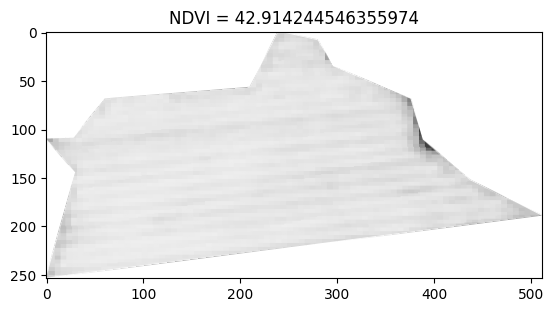

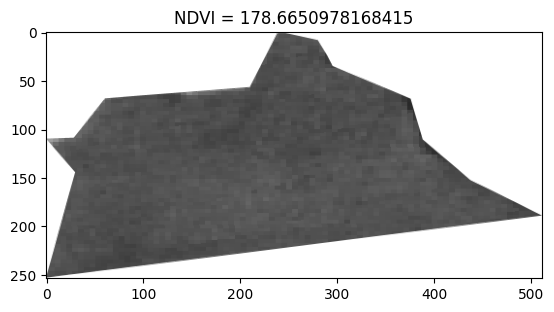

In [218]:
plot_NDVI(df_beauvais2019)